In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

rootDir = "CCSN_v2"

img_width, img_height = 150, 150
batch_size = 32
epochs = 20

allowed_subfolders = ["cumulus", "stratus", "cirrus"]

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', 
    classes=allowed_subfolders  
)

validation_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  
    classes=allowed_subfolders  
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(allowed_subfolders), activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)



Found 311 images belonging to 2 classes.
Found 76 images belonging to 2 classes.



Epoch 1/20


9/9 [==============================] - ETA: 0s - loss: 1.2811 - accuracy: 0.5520

C:\Users\Baptiste\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 11s 964ms/step - loss: 1.2811 - accuracy: 0.5520 - val_loss: 0.6676 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/20
9/9 [==============================] - 7s 774ms/step - loss: 0.6534 - accuracy: 0.6022 - val_loss: 0.6804 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 3/20
9/9 [==============================] - 7s 794ms/step - loss: 0.6164 - accuracy: 0.6487 - val_loss: 0.6406 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 4/20
9/9 [==============================] - 7s 790ms/step - loss: 0.6137 - accuracy: 0.6810 - val_loss: 0.6575 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - 8s 824ms/step - loss: 0.6465 - accuracy: 0.6882 - val_loss: 0.6747 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 9s 1s/step - loss: 0.6068 - accuracy: 0.6703 - val_loss: 0.6387 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 7/20
9/9 [==============================] - 8s 878ms/step - loss: 0.5915 - accuracy: 0.67

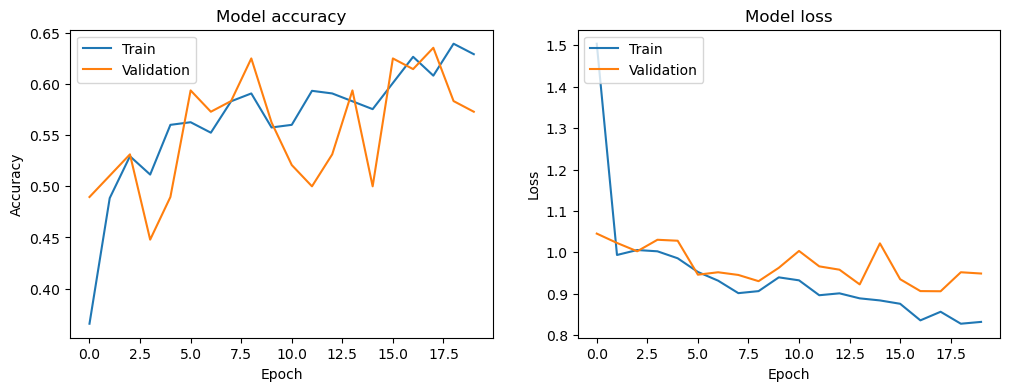

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('../models/cloud_classification_model_simplified2.keras')